In [1]:
!pip install stylecloud

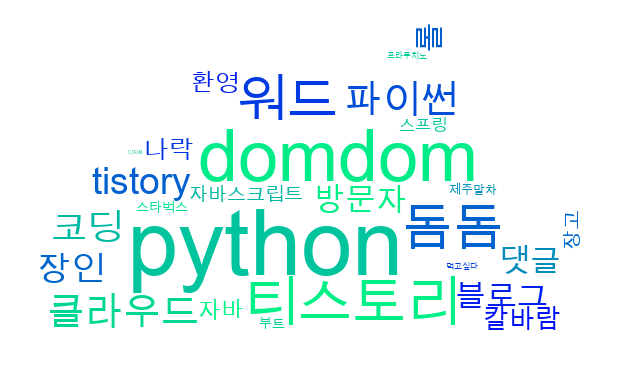

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


words = {
    'python':1965,
    'domdom':1666,
    '티스토리':955,
    '돔돔':855,
    '워드':841,
    '클라우드':612,
    '파이썬':598,
    'tistory':576,
    '코딩':542,
    '장인':487,
    '블로그':412,
    '방문자':401,
    '댓글':397,
    '롤':391,
    '칼바람':308,
    '나락':284,
    '환영':255,
    '자바':231,
    '장고':175,
    '자바스크립트':152,
    '스프링':109,
    '부트':71,
    '스타벅스':68,
    '제주말차':59,
    '프라푸치노':21,
    '먹고싶다':19,
    '디저트':6,
    '꿀잼':2
}
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

cand_mask=np.array(Image.open('/Users/gimtaehun/Desktop/무제 폴더 2/racoon_dog.jpg'))

wc=WordCloud(
    #font_path = "c:/Windows/fonts/malgun.ttf", # 한글 글씨체 설정
    font_path = '/Library/Fonts/Arial Unicode.ttf', # mac 한글글씨체 
    background_color='white', # 배경색은 흰색으로 
    colormap='winter', # 글씨색은 빨간색으로
    mask=cand_mask, # 워드클라우드 모양 설정
    width=800, height=600
)

cloud=wc.generate_from_frequencies(words)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [3]:
import pandas as pd
import glob #경로와 이름을 지정해 파일 처리 작업
import re
from functools import reduce

#nltk: 자연어 처리 패키지
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
import nltk

In [5]:
nltk.download() #최초 한번은 nltk의 리소스를 다운로드 받아야함

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
all_files = glob.glob('data/myCabinetExcelData*.xls')
all_files

['data/myCabinetExcelData (4).xls',
 'data/myCabinetExcelData (5).xls',
 'data/myCabinetExcelData (2).xls',
 'data/myCabinetExcelData (3).xls',
 'data/myCabinetExcelData (1).xls',
 'data/myCabinetExcelData.xls']

In [7]:
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
all_files_data[0].head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Linkage Disequilibrium of the Apo AI-CIII-AIV ...,"Song, J.",THE KOREAN SOCIETY FOR MOLECULAR BIOLOGY,1998
1,NaN,2,AN UPSIDE DOWN WORLD? ARTIFICIAL INTELLIGENCE ...,"Roy, Ria",WILEY,2021
2,NaN,3,MASTERPIECES AN EYE FOR AN AI: How hedge funde...,"Elliott, H.",FORBES MAGAZINE,2014
3,NaN,4,Biological screening of a diverse set of AI-2 ...,"Smith, J. I.; Wang, J.; Nguyen-Mau, S. M.; Lee...",Royal Society of Chemistry,2009
4,NaN,5,On the orientation relationships between AI5 p...,"Rong, T. S.",TAYLOR & FRANCIS LTD,1999


In [8]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index= True)
all_files_data_concat.tail()

,Unnamed: 0,번호,제목,저자,출판사,출판일
595,NaN,96,Where's AI Hiding?,"Hedberg, S.",MILLER FREEMAN INC,1995
596,NaN,97,Alexa Prize — State of the Art in Conversation...,"Khatri, Chandra; Venkatesh, Anu; Hedayatnia, B...",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2018
597,NaN,98,Editorial: Expository AI Applications,"Goel, Ashok",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
598,NaN,99,"Happy Anniversary, AAAI and AI Magazine!","Leake, D.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2005
599,NaN,100,The Coevolution of AI and AAAI,"Mackworth, A. K.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2005


In [9]:
all_files_data_concat.to_csv('data/riss_AI.csv', encoding = 'utf-8', index = False)


In [10]:
all_title = all_files_data_concat['제목']
all_title

0      Linkage Disequilibrium of the Apo AI-CIII-AIV ...
1      AN UPSIDE DOWN WORLD? ARTIFICIAL INTELLIGENCE ...
2      MASTERPIECES AN EYE FOR AN AI: How hedge funde...
3      Biological screening of a diverse set of AI-2 ...
4      On the orientation relationships between AI5 p...
                             ...                        
595                                   Where's AI Hiding?
596    Alexa Prize — State of the Art in Conversation...
597                Editorial: Expository AI Applications
598             Happy Anniversary, AAAI and AI Magazine!
599                       The Coevolution of AI and AAAI
Name: 제목, Length: 600, dtype: object

In [11]:
stopWords = set(stopwords.words('english'))

lemma = WordNetLemmatizer() #표제어 추출 작업


In [12]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-z]+"," ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
    

In [13]:
print(words[:5])

[['linkage', 'disequilibrium', 'apo', 'ai', 'ciii', 'aiv', 'gene', 'cluster', 'relationship', 'plasma', 'triglyceride', 'apolipoprotein', 'ai', 'ciii', 'level', 'korean'], ['upside', 'world', 'artificial', 'intelligence', 'ai', 'experiment', 'teach', 'human', 'empathy', 'road', 'lead', 'ai'], ['masterpiece', 'eye', 'ai', 'hedge', 'funder', 'christopher', 'tsai', 'amassed', 'unequaled', 'collection', 'ai', 'weiwei', 'work'], ['biological', 'screening', 'diverse', 'set', 'ai', 'analogue', 'vibrio', 'harveyi', 'suggests', 'receptor', 'involved', 'synergistic', 'agonism', 'ai', 'analogue', 'promiscuous'], ['orientation', 'relationship', 'ai', 'precipitate', 'nb', 'rich', 'matrix', 'nb', 'ai', 'x', 'alloy']]


In [14]:
words2 = list(reduce(lambda x , y : x+y, words)) #람다식써서 리스트를 더해준다 계속해서
print(words2)

['linkage', 'disequilibrium', 'apo', 'ai', 'ciii', 'aiv', 'gene', 'cluster', 'relationship', 'plasma', 'triglyceride', 'apolipoprotein', 'ai', 'ciii', 'level', 'korean', 'upside', 'world', 'artificial', 'intelligence', 'ai', 'experiment', 'teach', 'human', 'empathy', 'road', 'lead', 'ai', 'masterpiece', 'eye', 'ai', 'hedge', 'funder', 'christopher', 'tsai', 'amassed', 'unequaled', 'collection', 'ai', 'weiwei', 'work', 'biological', 'screening', 'diverse', 'set', 'ai', 'analogue', 'vibrio', 'harveyi', 'suggests', 'receptor', 'involved', 'synergistic', 'agonism', 'ai', 'analogue', 'promiscuous', 'orientation', 'relationship', 'ai', 'precipitate', 'nb', 'rich', 'matrix', 'nb', 'ai', 'x', 'alloy', 'dating', 'age', 'ai', 'people', 'continue', 'rely', 'computer', 'intelligence', 'shepherd', 'life', 'delegating', 'oftentimes', 'inexplicable', 'task', 'matchmaking', 'problem', 'solving', 'altar', 'ai', 'natural', 'progression', 'technical', 'note', 'hot', 'pressing', 'densification', 'ai', 'ai

In [15]:
count = Counter(words2)
count

Counter({'linkage': 2,
         'disequilibrium': 2,
         'apo': 5,
         'ai': 809,
         'ciii': 5,
         'aiv': 3,
         'gene': 7,
         'cluster': 3,
         'relationship': 4,
         'plasma': 5,
         'triglyceride': 2,
         'apolipoprotein': 6,
         'level': 11,
         'korean': 2,
         'upside': 2,
         'world': 8,
         'artificial': 27,
         'intelligence': 28,
         'experiment': 2,
         'teach': 8,
         'human': 18,
         'empathy': 2,
         'road': 4,
         'lead': 3,
         'masterpiece': 2,
         'eye': 5,
         'hedge': 2,
         'funder': 2,
         'christopher': 2,
         'tsai': 2,
         'amassed': 2,
         'unequaled': 2,
         'collection': 2,
         'weiwei': 4,
         'work': 16,
         'biological': 2,
         'screening': 3,
         'diverse': 4,
         'set': 4,
         'analogue': 4,
         'vibrio': 2,
         'harveyi': 2,
         'suggests': 2,
    

In [16]:
word_count = dict()

for tag,counts in count.most_common(50):
    if(len(str(tag)) >1):
        word_count[tag] = counts
        print("%s : %d"%(tag, counts))

ai : 809
based : 64
system : 37
application : 31
intelligence : 28
artificial : 27
using : 25
technology : 24
research : 21
ti : 20
aluminum : 20
titanium : 20
iot : 20
study : 19
human : 18
approach : 17
work : 16
game : 16
method : 15
phase : 15
data : 15
new : 15
education : 15
management : 14
case : 14
prediction : 13
real : 13
enabled : 12
level : 11
cu : 11
learning : 11
structure : 11
tool : 11
society : 11
control : 10
future : 10
analysis : 10
information : 10
driven : 10
security : 10
teaching : 10
challenge : 10
intelligent : 10
toward : 10
web : 10
problem : 9
building : 9


In [17]:
del word_count['ai'] #ai 단어는 카운트하지 않겠다

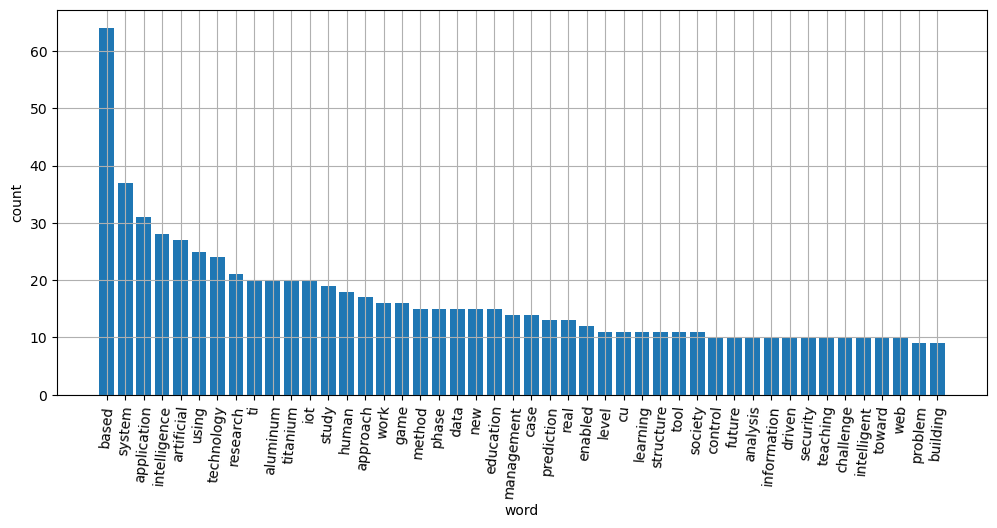

In [18]:
#그래프
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

In [19]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일' , as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1938,2
1,1940,1
2,1960,1
3,1962,1
4,1966,1
5,1985,2
6,1988,1
7,1989,2
8,1991,2
9,1992,3


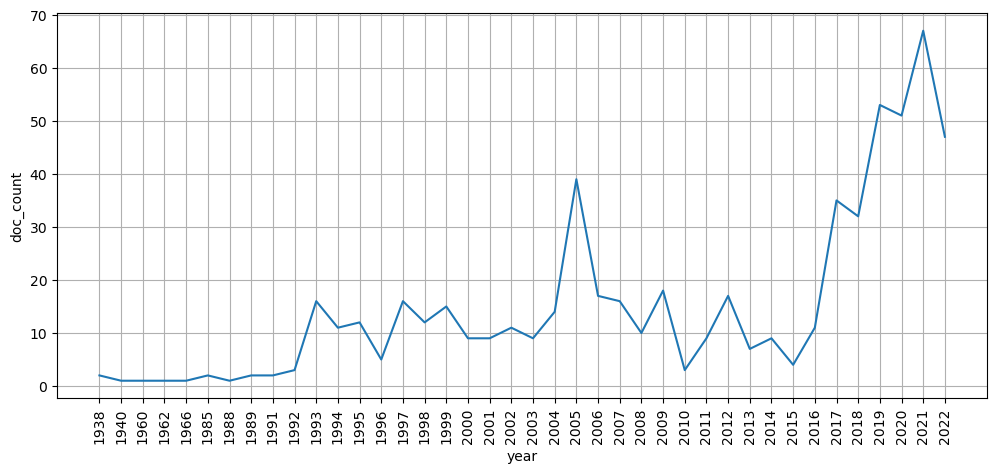

In [20]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc_count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [y for y in summary_year['출판일']], rotation = 90)

plt.show()

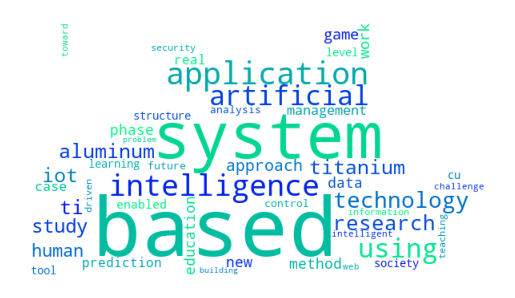

In [21]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color= 'white', colormap='winter' , stopwords = stopwords
             , width = 1000, height = 800,mask=cand_mask)

cand_mask=np.array(Image.open('/Users/gimtaehun/Desktop/무제 폴더 2/racoon_dog.jpg'))
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off') #x,y축 안보이게
plt.show()

In [22]:
from konlpy.tag import Okt
from collections import Counter


In [23]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [24]:
inputFileName = '/Users/gimtaehun/day1107/부자_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding = 'utf-8').read())
data

[{'cnt': 1,
  'description': '<b>부자</b> 관계의 갈등과 적대를 다룬 수많은 서사가 끝내 떨쳐버리지 못하는 신파적 호소와 감상적 가족주의는 이 영화에 들어설 자리가 없다. 엄마를 평생 갉아먹는 존재 요컨대 수경은 딸에게 희생한 자신의 과거를 거듭... ',
  'link': 'https://n.news.naver.com/mnews/article/036/0000047280?sid=103',
  'org_link': 'https://h21.hani.co.kr/arti/culture/culture_general/52841.html',
  'pDate': '2022-11-08 09:33:00',
  'title': '모녀간 끈끈한 애정 따윈 기대 말라'},
 {'cnt': 2,
  'description': '“지방에 사는 <b>부자</b>들이 진짜 알<b>부자</b>다”라는 얘기 들어 보셨나요? 대한민국의 부는 서울에 집중되어 있다고 생각하여 자산가들 역시 수도권에 거주할 것이라고 생각하기 쉽겠지만, 이는 잘못된 생각입니다.... ',
  'link': 'http://www.rcast.co.kr/sub02.php?BRD_ID=1667867480938',
  'org_link': 'http://www.rcast.co.kr/sub02.php?BRD_ID=1667867480938',
  'pDate': '2022-11-08 09:32:00',
  'title': '대구서 <b>부자</b> 소리 들으려면 얼마 있어야 할까? 대구 <b>부자</b> 대해부'},
 {'cnt': 3,
  'description': '국회를 장악한 더불어민주당은 &apos;<b>부자</b> 감세 반대&apos;를 당론으로 내세워 다주택자 종부세율 인하안 등이 담긴 보유세법 등 개정안에 반대의사를 굽히지 않고 있다. 전문가들은 올해 종부세에 지난해 공시가격 반영... ',
  'link': 'http://www.metroseoul.co.kr/article/2022110

In [25]:
description = ' '
for item in data:
    if 'description' in item.keys():
        description = description + re.sub(r"[^\w]",' ',item['description'])
description[:100]

'  b 부자  b  관계의 갈등과 적대를 다룬 수많은 서사가 끝내 떨쳐버리지 못하는 신파적 호소와 감상적 가족주의는 이 영화에 들어설 자리가 없다  엄마를 평생 갉아먹는 존재 요컨'

In [26]:
nlp = Okt()
message_N = nlp.nouns(description)
message_N[:10]

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/jdk-18.0.2.1.jdk/Contents/Home/lib/libjli.dylib


In [ ]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts

In [ ]:
font_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("키워드")
plt.ylabel("빈도수")
plt.grid(True)

sorted_Keys = sorted(word_count, key = word_count.get , reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '75')

In [ ]:

wc = WordCloud(font_path, background_color = 'winter', width = 800 , height = 600)

cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off') #x,y축 안보이게
plt.show()